In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow

In [3]:
import math
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
stores_df = pd.read_csv("Super_Store_data.csv", encoding='latin' , header=0, parse_dates = True)

In [5]:
stores_df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
stores_df.tail()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12-05-2016,12-10-2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,09-06-2015,09-09-2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [7]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         2121 non-null   int64  
 1   Order_ID       2121 non-null   object 
 2   Order_Date     2121 non-null   object 
 3   Ship_Date      2121 non-null   object 
 4   Ship_Mode      2121 non-null   object 
 5   Customer_ID    2121 non-null   object 
 6   Customer_Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal_Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product_ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product_Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [8]:
stores_df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [9]:
stores_df.isna().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub-Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
stores_df.shape

(2121, 21)

In [11]:
stores_df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
stores_df["Ship_Mode"].value_counts()

Ship_Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64

In [13]:
stores_df["Segment"].value_counts()

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64

In [14]:
stores_df["Country"].value_counts()

Country
United States    2121
Name: count, dtype: int64

In [15]:
stores_df["City"].nunique()

371

In [16]:
print(stores_df['State'].value_counts())
print(stores_df['State'].nunique())

State
California              444
New York                236
Texas                   202
Pennsylvania            125
Illinois                123
Washington              114
Ohio                     93
Florida                  85
Virginia                 52
Colorado                 51
Michigan                 50
Arizona                  49
Tennessee                45
North Carolina           42
Massachusetts            33
Georgia                  32
Wisconsin                32
Kentucky                 30
Maryland                 28
New Jersey               26
Indiana                  23
Oregon                   21
Delaware                 18
Rhode Island             16
Oklahoma                 15
Minnesota                13
Connecticut              13
Louisiana                11
Alabama                  11
Missouri                 11
Mississippi               9
Arkansas                  9
Nevada                    9
Utah                      7
New Hampshire             6
South Carolina

In [17]:
stores_df['Region'].value_counts()

Region
West       707
East       601
Central    481
South      332
Name: count, dtype: int64

In [18]:
stores_df["Category"].value_counts()

Category
Furniture    2121
Name: count, dtype: int64

In [19]:
stores_df['Sub-Category'].value_counts()

Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64

In [20]:
stores_df['Product_Name'].value_counts()

Product_Name
KI Adjustable-Height Table                                                   18
Staple-based wall hangings                                                   16
Situations Contoured Folding Chairs, 4/Set                                   15
Eldon Wave Desk Accessories                                                  14
Global Wood Trimmed Manager's Task Chair, Khaki                              14
                                                                             ..
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops             1
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled      1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                  1
Ultra Commercial Grade Dual Valve Door Closer                                 1
Name: count, Length: 380, dtype: int64

In [21]:
print(stores_df['Quantity'].value_counts())
print(stores_df['Quantity'].nunique())

Quantity
3     534
2     503
5     253
4     247
1     193
6     121
7     115
9      58
8      58
10     12
14      8
11      8
12      6
13      5
Name: count, dtype: int64
14


In [22]:
print(stores_df['Discount'].value_counts())
print(stores_df['Discount'].nunique())

Discount
0.00    836
0.20    615
0.30    222
0.60    138
0.10     76
0.40     75
0.50     54
0.15     52
0.32     27
0.70     15
0.45     11
Name: count, dtype: int64
11


In [23]:
print(stores_df['Sales'].max())
print(stores_df['Sales'].min())

4416.174
1.892


In [24]:
print(stores_df['Profit'].max())
print(stores_df['Profit'].min())

1013.127
-1862.3124


In [25]:
stores_df['Order_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Order_Date
Non-Null Count  Dtype 
--------------  ----- 
2121 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


In [26]:
stores_df['Order_Date'] = pd.to_datetime(stores_df['Order_Date'], errors='coerce')
stores_df['Order_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Order_Date
Non-Null Count  Dtype         
--------------  -----         
838 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 KB


In [27]:
stores_df.sort_values(by='Order_Date', inplace=True)
stores_df.head(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
1577,7475,CA-2014-167199,2014-01-06,01-10-2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
1626,7661,CA-2014-105417,2014-01-07,01-12-2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
1959,9267,CA-2014-125759,2014-02-08,02-09-2014,First Class,NM-18445,Nathan Mautz,Home Office,United States,North Las Vegas,...,89031,West,FUR-FU-10002111,Furniture,Furnishings,"Master Caster Door Stop, Large Brown",14.560,2,0.0,5.5328
1956,9258,CA-2014-168368,2014-02-11,2/15/2014,Second Class,GA-14725,Guy Armstrong,Consumer,United States,Columbia,...,65203,Central,FUR-FU-10002298,Furniture,Furnishings,"Rubbermaid ClusterMat Chairmats, Mat Size- 66""...",332.940,3,0.0,53.2704
1955,9255,CA-2014-168368,2014-02-11,2/15/2014,Second Class,GA-14725,Guy Armstrong,Consumer,United States,Columbia,...,65203,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",60.890,1,0.0,15.2225
1165,5632,CA-2014-127614,2014-02-11,2/15/2014,Standard Class,NF-18385,Natalie Fritzler,Consumer,United States,Chesapeake,...,23320,South,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,1256.220,6,0.0,75.3732
97,457,US-2014-110674,2014-02-12,2/18/2014,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Concord,...,94521,West,FUR-CH-10000225,Furniture,Chairs,"Global Geo Office Task Chair, Gray",129.568,2,0.2,-24.2940
1762,8311,CA-2014-168312,2014-03-01,03-07-2014,Standard Class,GW-14605,Giulietta Weimer,Consumer,United States,Houston,...,77036,Central,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.3,-43.0296


In [28]:
stores_df.set_index('Order_Date', inplace=True)
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2014-01-06 to NaT
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         2121 non-null   int64  
 1   Order_ID       2121 non-null   object 
 2   Ship_Date      2121 non-null   object 
 3   Ship_Mode      2121 non-null   object 
 4   Customer_ID    2121 non-null   object 
 5   Customer_Name  2121 non-null   object 
 6   Segment        2121 non-null   object 
 7   Country        2121 non-null   object 
 8   City           2121 non-null   object 
 9   State          2121 non-null   object 
 10  Postal_Code    2121 non-null   int64  
 11  Region         2121 non-null   object 
 12  Product_ID     2121 non-null   object 
 13  Category       2121 non-null   object 
 14  Sub-Category   2121 non-null   object 
 15  Product_Name   2121 non-null   object 
 16  Sales          2121 non-null   float64
 17  Quantity       2121 non-null   int64  
 1

In [29]:
stores_data = stores_df.drop(labels = ['Row_ID', 'Order_ID', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
                         'Postal_Code', 'Product_ID', 'Category','Product_Name'], axis = 1, inplace = True)
stores_df.shape

(2121, 6)

In [30]:
stores_df.head(10)

,Region,Sub-Category,Sales,Quantity,Discount,Profit
Order_Date,,,,,,
2014-01-06,South,Chairs,2573.820,9,0.0,746.4078
2014-01-07,Central,Furnishings,76.728,3,0.6,-53.7096
2014-01-10,South,Furnishings,51.940,1,0.0,21.2954
2014-01-11,East,Furnishings,9.940,2,0.0,3.0814
2014-02-08,West,Furnishings,14.560,2,0.0,5.5328
2014-02-11,Central,Furnishings,332.940,3,0.0,53.2704
2014-02-11,Central,Chairs,60.890,1,0.0,15.2225
2014-02-11,South,Tables,1256.220,6,0.0,75.3732
2014-02-12,West,Chairs,129.568,2,0.2,-24.2940


<Axes: xlabel='Order_Date'>

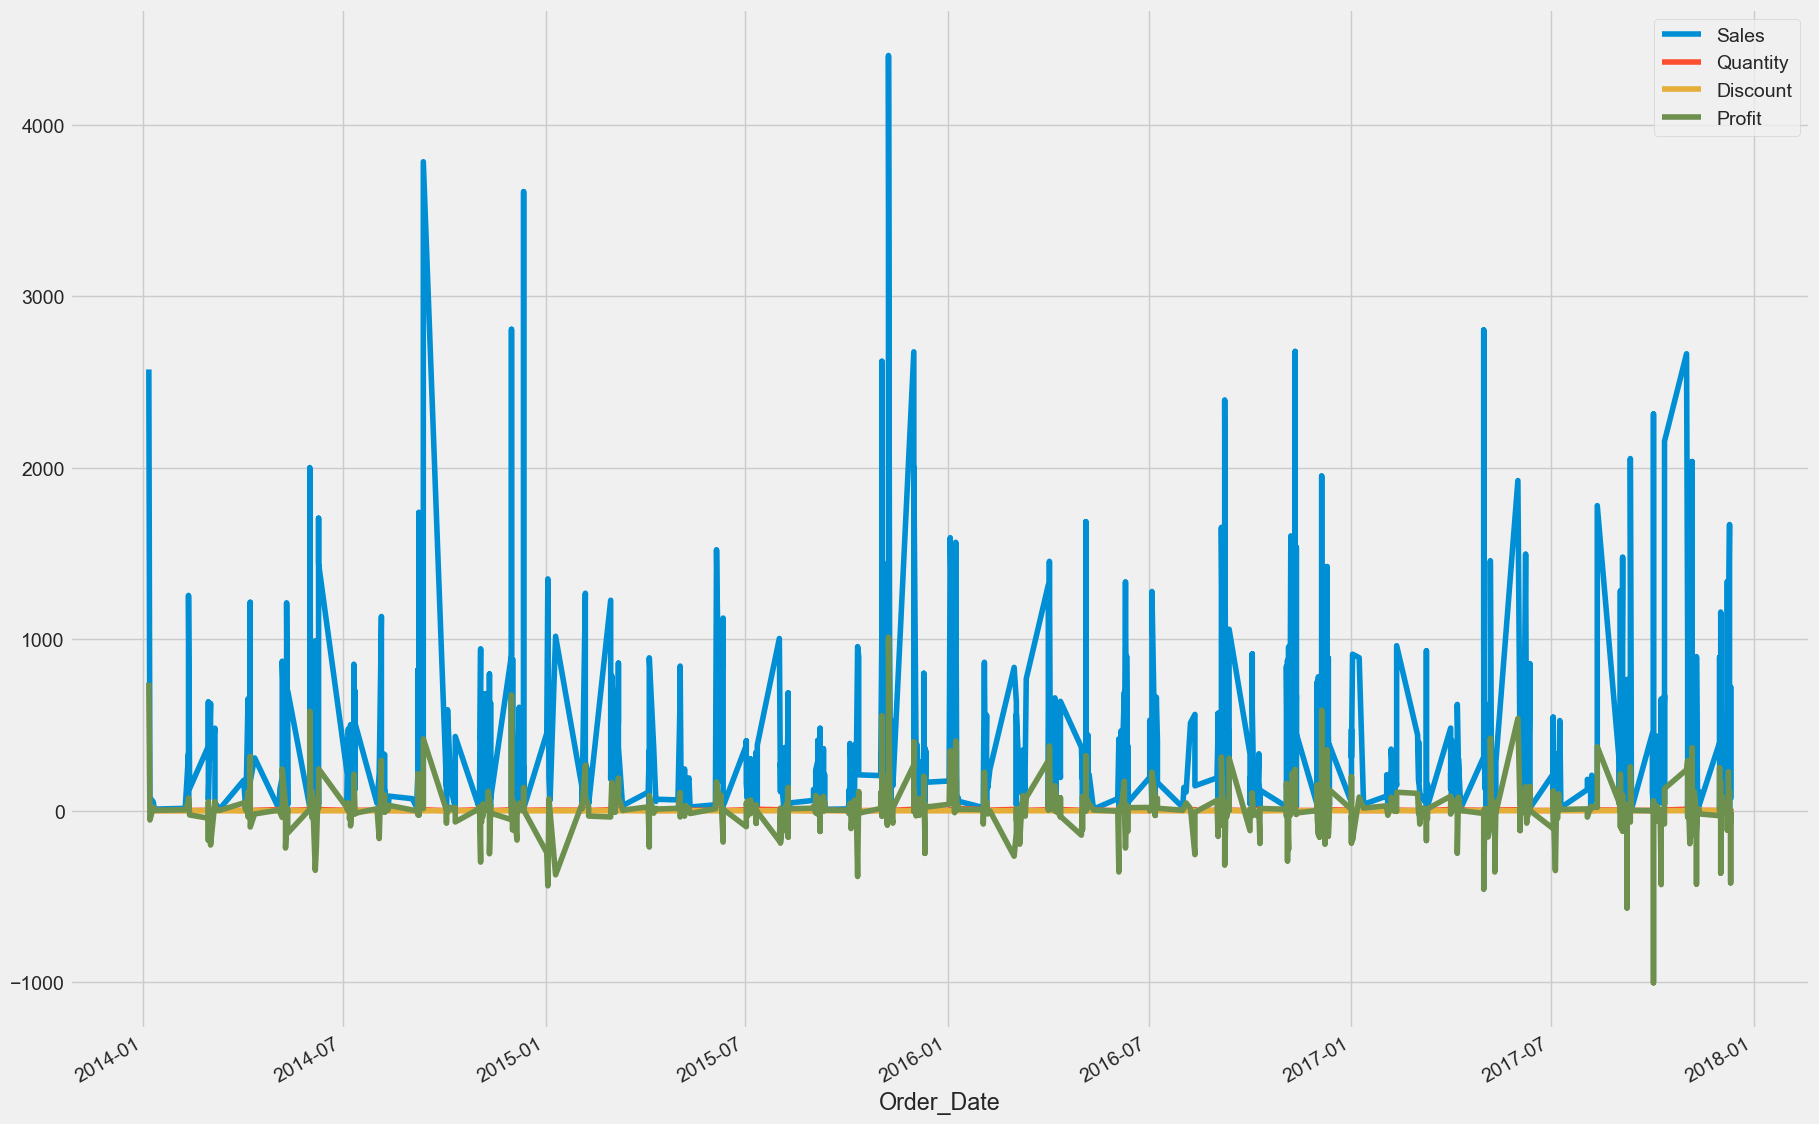

In [31]:
stores_df.plot(figsize = (20, 15))

<Axes: xlabel='Order_Date'>

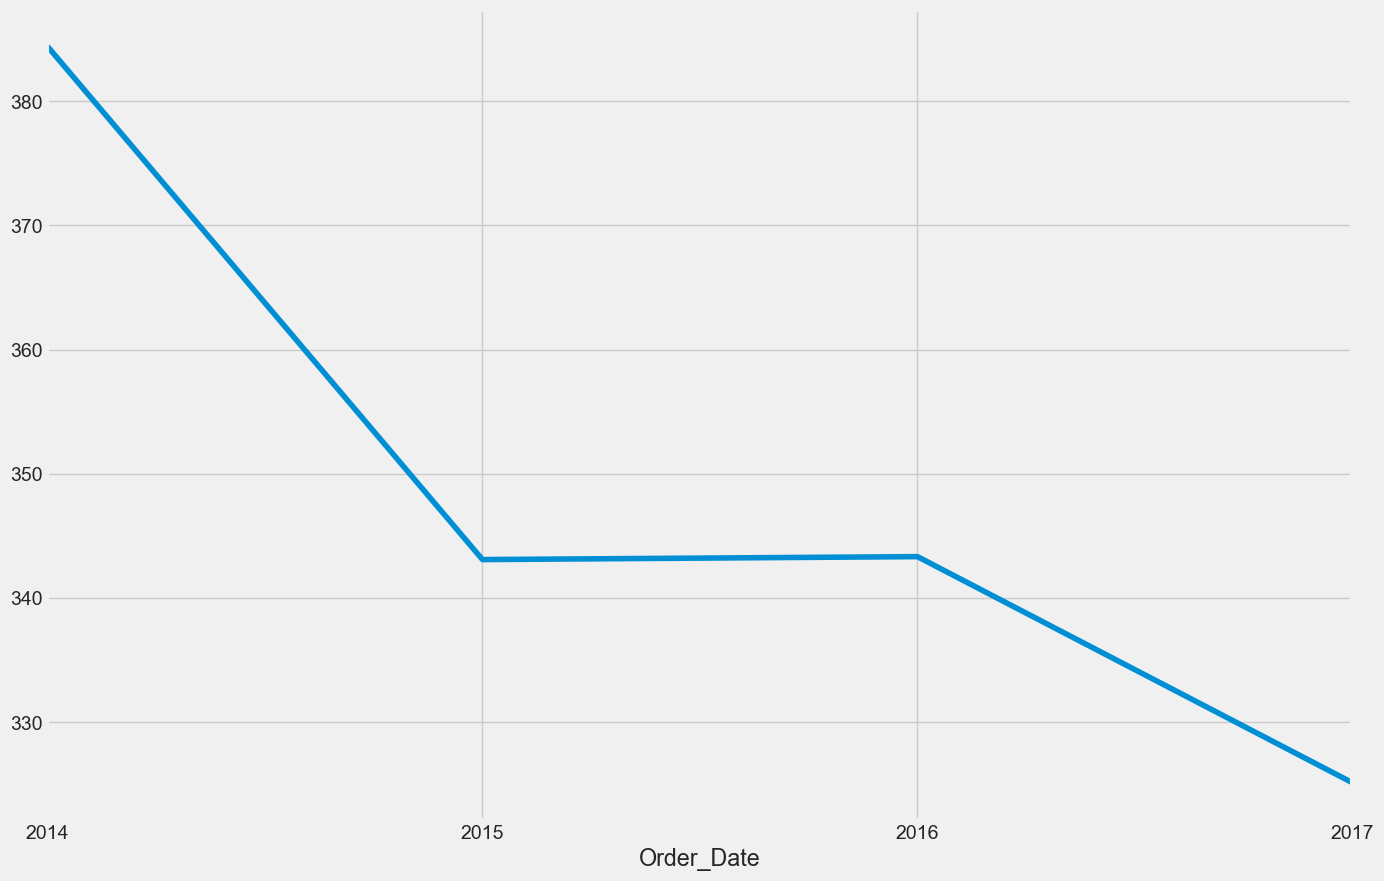

In [32]:
Y_Sales = stores_df['Sales'].resample('Y').mean()
Y_Sales.plot(figsize =(15, 10))

<Axes: xlabel='Order_Date'>

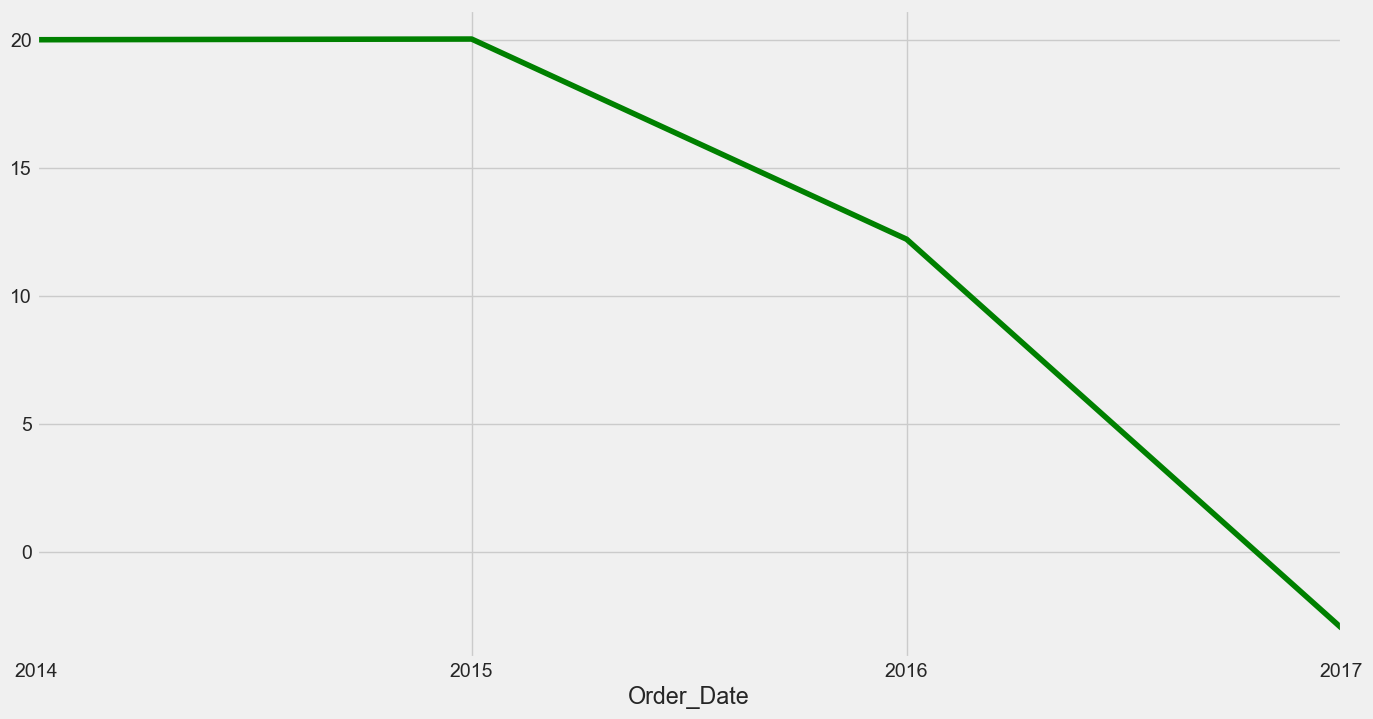

In [33]:
Y_Profit = stores_df['Profit'].resample('Y').mean()
Y_Profit.plot(figsize =(15, 8), c= "g")

<Axes: xlabel='Order_Date'>

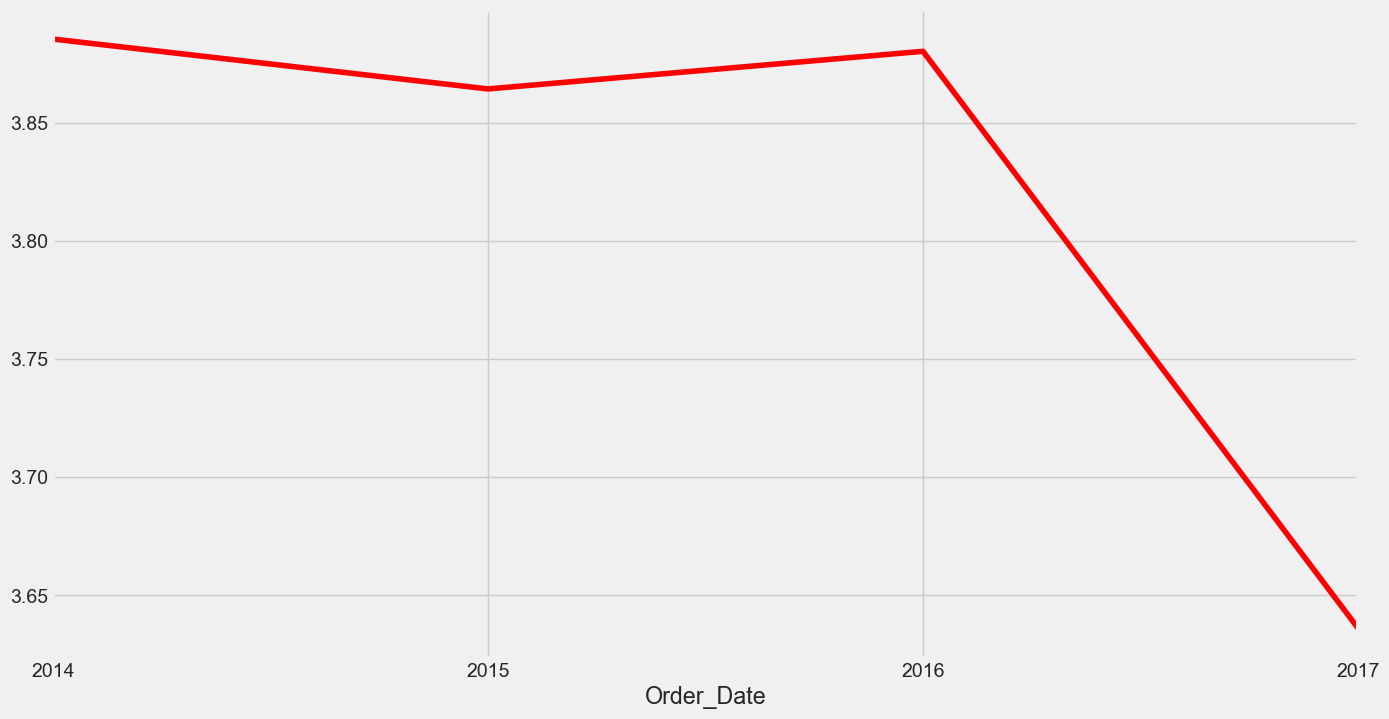

In [34]:
Y_Quantity = stores_df['Quantity'].resample('Y').mean()
Y_Quantity.plot(figsize =(15, 8), c ="r")

<Axes: xlabel='Order_Date'>

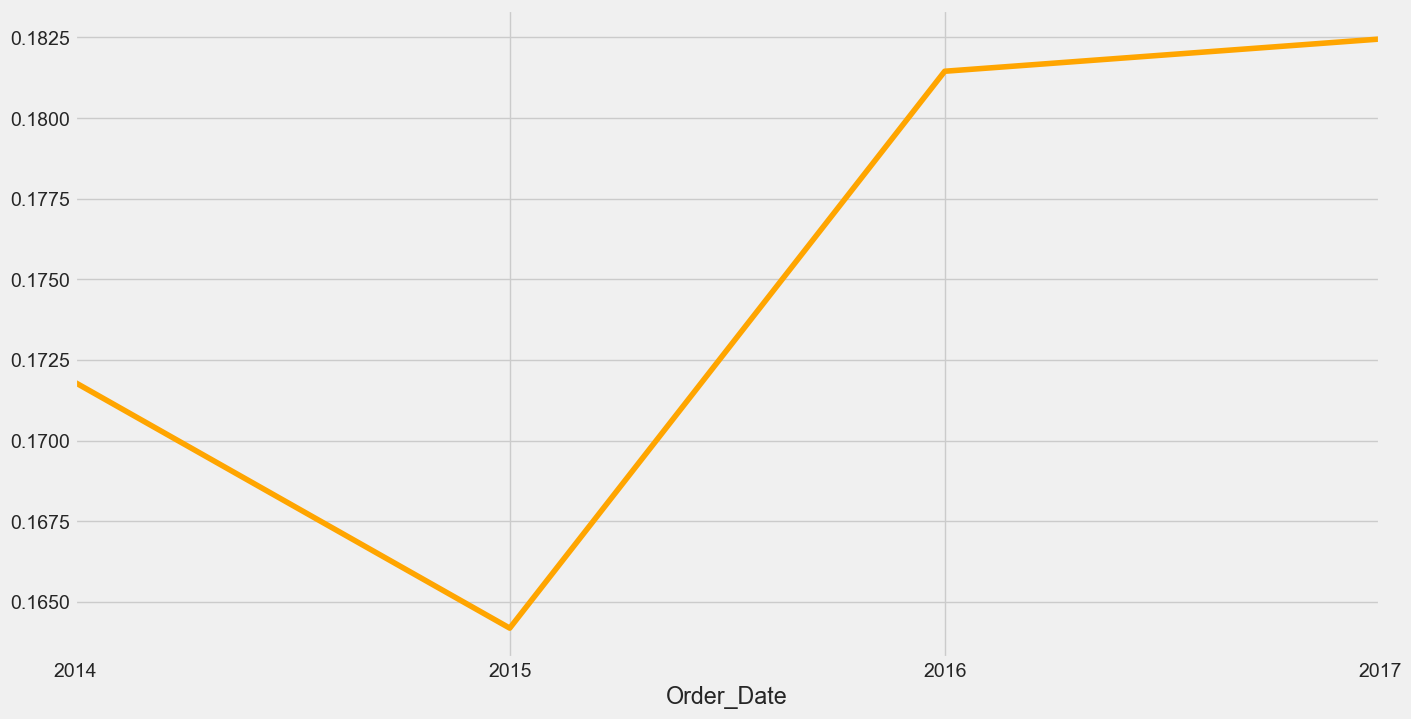

In [35]:
Y_Discount = stores_df['Discount'].resample('Y').mean()
Y_Discount.plot(figsize =(15, 8), c ="orange", )

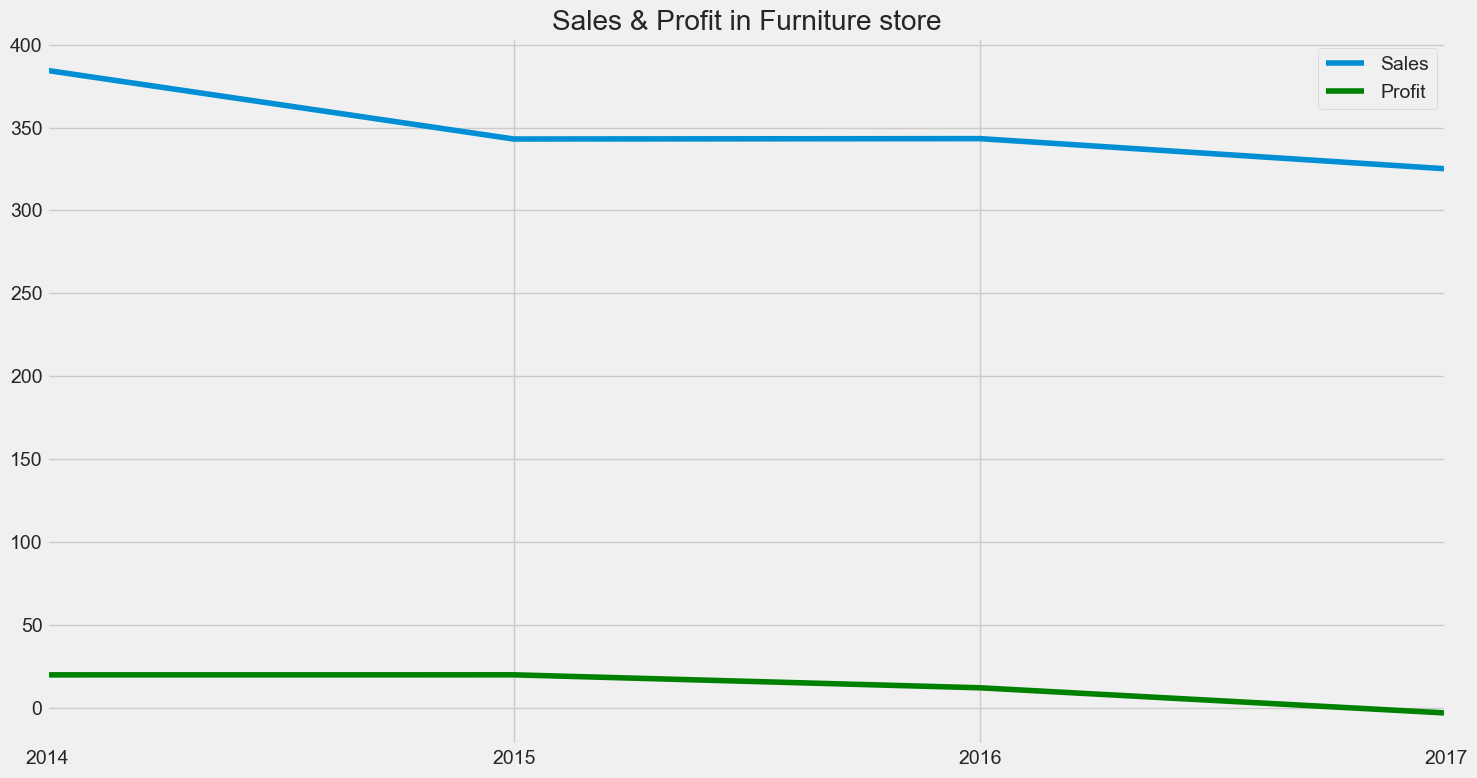

In [36]:
plt.figure(figsize=(15, 8))
Y_Sales.plot()
Y_Profit.plot(c = 'g')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Sales & Profit in Furniture store")
plt.legend(['Sales', 'Profit'])
plt.tight_layout()
plt.show()

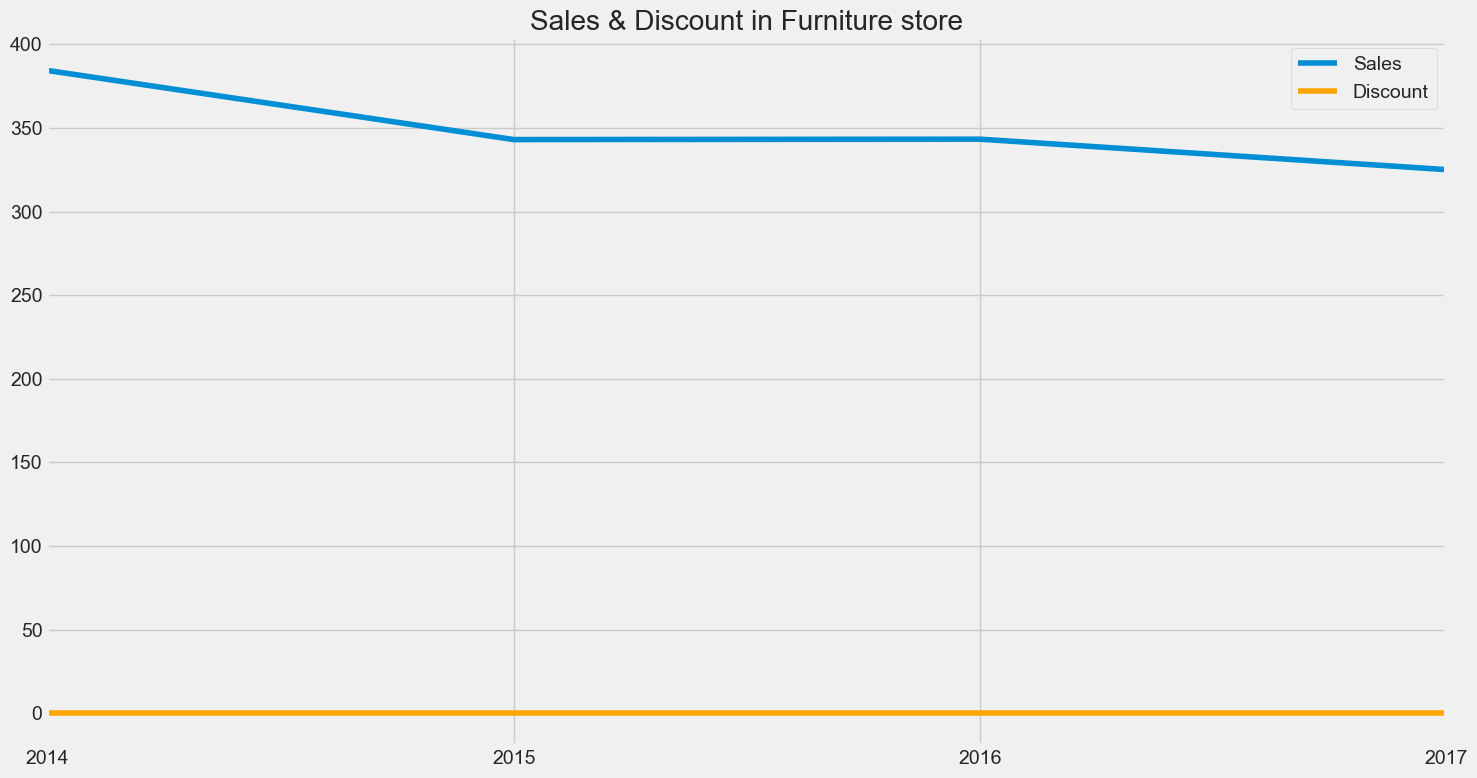

In [37]:
plt.figure(figsize=(15, 8))
Y_Sales.plot()
Y_Discount.plot(c = 'orange')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Sales & Discount in Furniture store")
plt.legend(['Sales', 'Discount'])
plt.tight_layout()
plt.show()

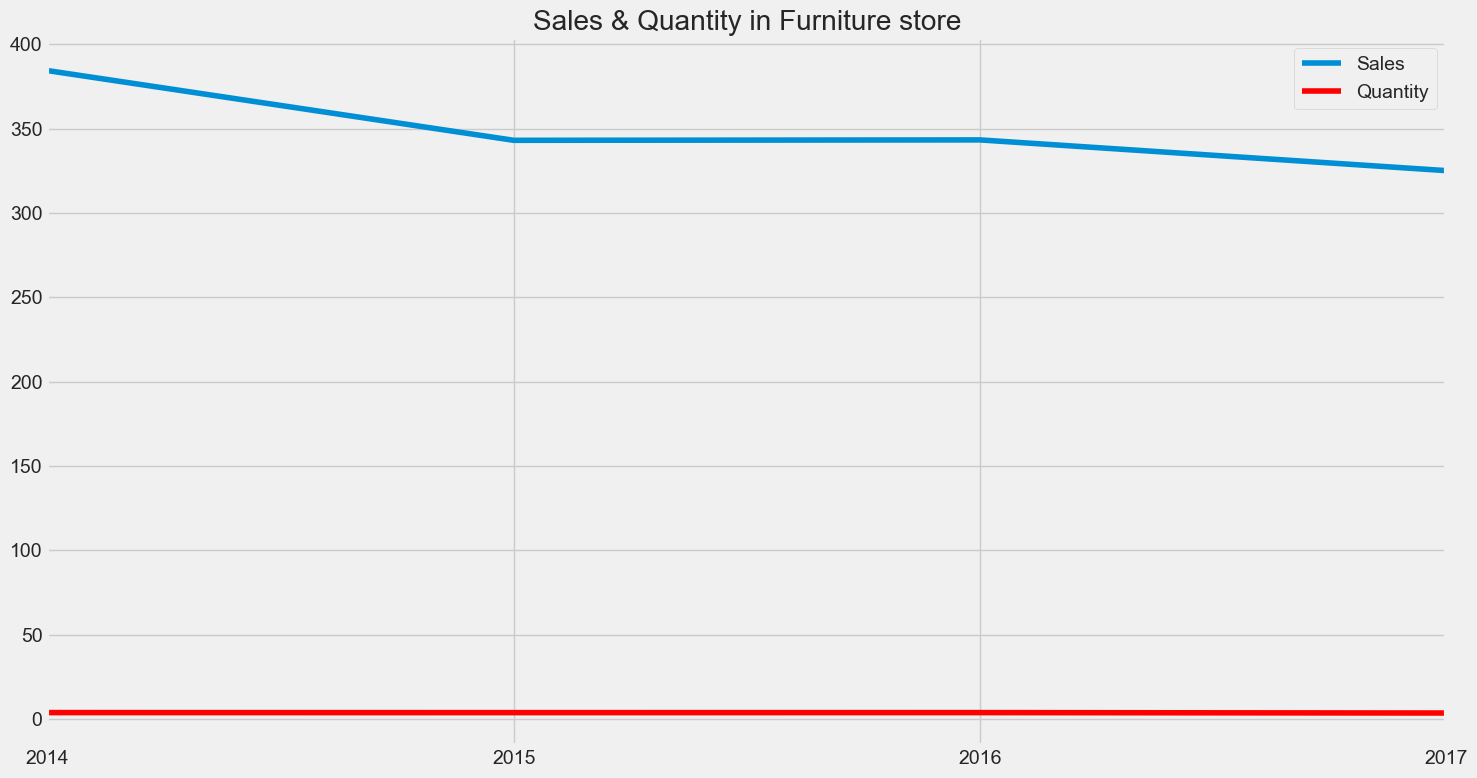

In [38]:
plt.figure(figsize=(15, 8))
Y_Sales.plot()
Y_Quantity.plot(c = 'r')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Sales & Quantity in Furniture store")
plt.legend(['Sales', 'Quantity'])
plt.tight_layout()
plt.show()

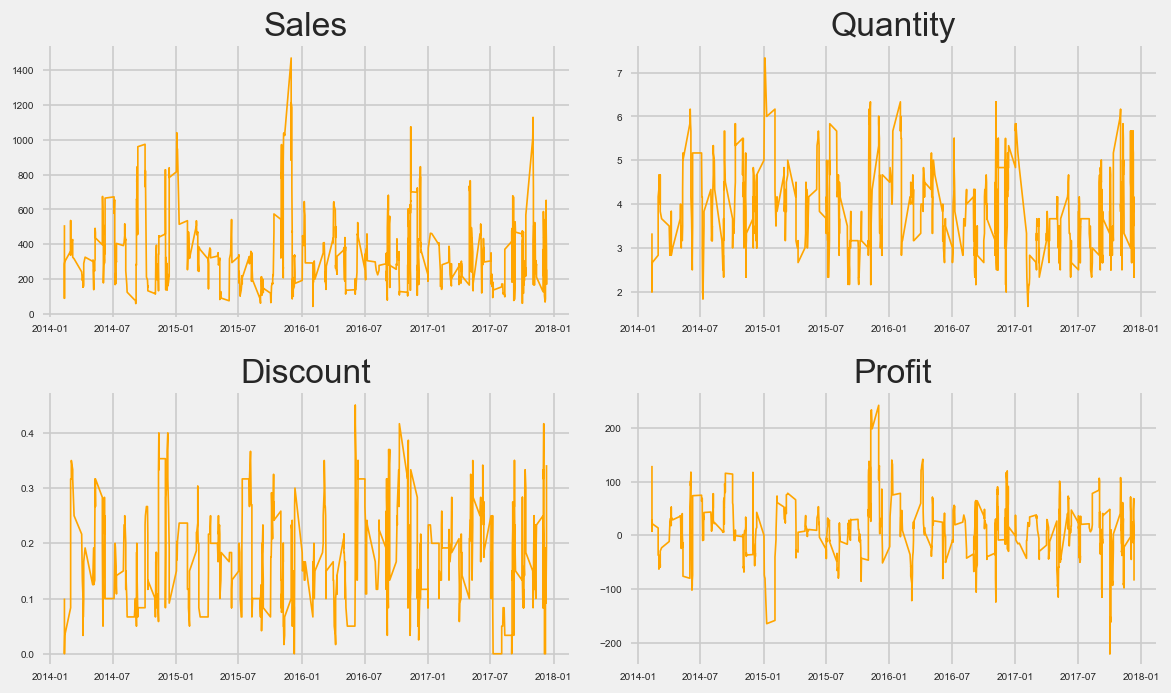

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming stores_df is your DataFrame
numeric_columns = stores_df.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(numeric_columns):  # Check if there are still numeric columns to plot
        column = numeric_columns[i]
        ax.plot(stores_df[column].rolling(6).mean(), color='orange', linewidth=1)
        # Decorations
        ax.set_title(column)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()


In [40]:
encoder = LabelEncoder()

stores_df['Region'] = encoder.fit_transform(stores_df['Region'])
stores_df['Sub-Category'] = encoder.fit_transform(stores_df['Sub-Category'])
stores_df.head(10)

,Region,Sub-Category,Sales,Quantity,Discount,Profit
Order_Date,,,,,,
2014-01-06,2,1,2573.820,9,0.0,746.4078
2014-01-07,0,2,76.728,3,0.6,-53.7096
2014-01-10,2,2,51.940,1,0.0,21.2954
2014-01-11,1,2,9.940,2,0.0,3.0814
2014-02-08,3,2,14.560,2,0.0,5.5328
2014-02-11,0,2,332.940,3,0.0,53.2704
2014-02-11,0,1,60.890,1,0.0,15.2225
2014-02-11,2,3,1256.220,6,0.0,75.3732
2014-02-12,3,1,129.568,2,0.2,-24.2940


In [41]:
data = stores_df[['Region', 'Sub-Category','Quantity','Discount','Profit','Sales']]
train =data.iloc[:-400]
test = data.iloc[-400: ]
print(f"Lenght of train: {len(train)}\n\n Length of test: {len(test)}")

Lenght of train: 1721

 Length of test: 400


In [42]:
train = train.values.tolist()
test = test.values.tolist()

In [43]:
ad_fuller_result_1 = adfuller(stores_df['Sales'].diff()[1:])

print('Sales')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(stores_df['Profit'].diff()[1:])

print('Profit')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(stores_df['Discount'].diff()[1:])

print('Discount')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(stores_df['Quantity'].diff()[1:])

print('Quantity')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Sales
ADF Statistic: -14.86834539466643
p-value: 1.6780768798878692e-27

---------------------

Profit
ADF Statistic: -14.407266300689436
p-value: 8.317308485923897e-27

---------------------

Discount
ADF Statistic: -14.407266300689436
p-value: 8.317308485923897e-27

---------------------

Quantity
ADF Statistic: -14.407266300689436
p-value: 8.317308485923897e-27


In [44]:
print('Discount causes Profit?\n')
print('------------------')
granger_1 = grangercausalitytests(stores_df[['Discount', 'Profit']], 4)

print('\Profit causes Discount?\n')
print('------------------')
granger_2 = grangercausalitytests(stores_df[['Profit', 'Discount']], 4)

Discount causes Profit?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8252  , p=0.1768  , df_denom=2117, df_num=1
ssr based chi2 test:   chi2=1.8278  , p=0.1764  , df=1
likelihood ratio test: chi2=1.8270  , p=0.1765  , df=1
parameter F test:         F=1.8252  , p=0.1768  , df_denom=2117, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7770  , p=0.1694  , df_denom=2114, df_num=2
ssr based chi2 test:   chi2=3.5625  , p=0.1684  , df=2
likelihood ratio test: chi2=3.5595  , p=0.1687  , df=2
parameter F test:         F=1.7770  , p=0.1694  , df_denom=2114, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2434  , p=0.2924  , df_denom=2111, df_num=3
ssr based chi2 test:   chi2=3.7424  , p=0.2907  , df=3
likelihood ratio test: chi2=3.7391  , p=0.2910  , df=3
parameter F test:         F=1.2434  , p=0.2924  , df_denom=2111, df_num=3

Granger Causality
number of lags (no zero) 

In [45]:
model = VARMAX(train, order=(1,1,1,1,1,1))

C:\Users\vedxn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [46]:
result = model.fit(disp=False)
result

C:\Users\vedxn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


In [47]:
forecast = result.forecast(steps=365)## A  VARMAX model
len(forecast)

365

In [48]:
Forecasted = pd.DataFrame(forecast)
Forecasted

,0,1,2,3,4,5
0,1.598952,1.636167,3.762137,0.156630,20.043005,349.148157
1,1.609029,1.643621,3.791604,0.169607,11.867537,354.142721
2,1.612289,1.644625,3.795269,0.171448,11.148325,353.064029
3,1.613285,1.644427,3.795395,0.171663,11.072214,352.819089
4,1.613533,1.644396,3.795455,0.171683,11.064769,352.783687
...,...,...,...,...,...,...
360,1.613597,1.644393,3.795468,0.171685,11.063780,352.777735
361,1.613597,1.644393,3.795468,0.171685,11.063780,352.777735
362,1.613597,1.644393,3.795468,0.171685,11.063780,352.777735
363,1.613597,1.644393,3.795468,0.171685,11.063780,352.777735
